In [915]:
# Imports

import pandas as pd
import numpy as np
from pandas import read_csv
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

# Setting display options
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100000)

In [ ]:
# Reading the first dataset (single .csv file)
food_prices = read_csv('RTFP_mkt_2021-12-02.csv')

# Reading the second dataset (multiple .csv files)
drug_prices = pd.concat(map(pd.read_csv, ['TM_2007.csv', 'TM_2008.csv', 'TM_2009.csv', 
                                         'TM_2010.csv', 'TM_2011.csv', 'TM_2012.csv', 
                                         'TM_2013.csv', 'TM_2014.csv', 'TM_2015.csv',
                                          'TM_2017.csv', 'TM_2018.csv', 'TM_2019.csv', 
                                          'TM_2020.csv', 'TM_2021.csv']))

In [916]:
# DRUG PRICE DATASET

In [917]:
# A brief snapshot of the dataset
drug_prices.head()

,Medication_Name,Package_Size,Max_Retailer_Price,Max_Consumer_Price,Max_Consumer_VAT_Price,Year,קוד
0,ABBOSYNAGIS 100MG PUL FOR INJ+SOLV,1.0,6022.540139,7076.484664,8173.339786,2007,NaN
1,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,1.0,3584.941821,4212.306640,4865.214169,2007,NaN
2,ABITREN 100MG 10 SR TAB,10.0,13.581967,18.607294,21.491425,2007,NaN
3,ABITREN 100MG 20 SR TAB,20.0,27.163933,37.214589,42.982850,2007,NaN
4,ABITREN 25MG 20TAB,20.0,5.076567,6.954896,8.032905,2007,NaN


In [918]:
# Removing the last column which is erroneous
drug_prices = drug_prices.iloc[:, :-1]

In [919]:
# Counting the number of unique drugs
drug_prices['Medication_Name'].nunique()

4915

In [920]:
# Viewing NaN values
drug_prices[drug_prices.isna().any(axis=1)]

,Medication_Name,Package_Size,Max_Retailer_Price,Max_Consumer_Price,Max_Consumer_VAT_Price,Year
20,ADEXONE SOL 50ML,50.0,NaN,NaN,NaN,2007
29,AFLUMYCIN CREAM 20GR,20.0,NaN,NaN,NaN,2007
36,AGISPOR SHAMPO 100ML,100.0,NaN,NaN,NaN,2007
44,AHISTON COMP DRP15ML,15.0,NaN,NaN,NaN,2007
45,AKNE-MYCIN EMUL. 25G,25.0,NaN,NaN,NaN,2007
...,...,...,...,...,...,...
3103,YAZ PLUS 1X28TAB,28.0,NaN,NaN,NaN,2021
3104,YAZ PLUS 3X28 F.C.TAB,84.0,NaN,NaN,NaN,2021
3139,ZINCOL 220MG 30TAB,30.0,NaN,NaN,NaN,2021
3175,ZYLET OPHT SUSP 5 ML,5.0,NaN,NaN,NaN,2021


In [921]:
# Replacing NaN values with either the prior value, or the next value
# after grouping by Medication_Name
drug_prices['Max_Retailer_Price'] = drug_prices.groupby('Medication_Name')['Max_Retailer_Price'].ffill().bfill()
drug_prices['Max_Consumer_Price'] = drug_prices.groupby('Medication_Name')['Max_Consumer_Price'].ffill().bfill()
drug_prices['Max_Consumer_VAT_Price'] = drug_prices.groupby('Medication_Name')['Max_Consumer_VAT_Price'].ffill().bfill()
drug_prices['Package_Size'] = drug_prices.groupby('Medication_Name')['Package_Size'].ffill().bfill()

In [922]:
# No NaN values are remaining
drug_prices[drug_prices.isna().any(axis=1)]

,Medication_Name,Package_Size,Max_Retailer_Price,Max_Consumer_Price,Max_Consumer_VAT_Price,Year


In [923]:
# Checking each unique year - 2016 is missing
print(sorted(drug_prices['Year'].unique()))

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018, 2019, 2020, 2021]


In [924]:
# Checking the count of each Medication_Name
# if count != 14 (not including 2016 for now, otherwise would be count != 15),
# then we don't have every year
drug_prices.groupby('Medication_Name').count().iloc[:, -1]

Medication_Name
A-PARKIN 100MG 100TAB                        2
ABBOSYNAGIS 100MG PUL FOR INJ+SOLV          13
ABBOSYNAGIS 50MG PUL FOR INJ+SOLV           14
ABELCET 5MG/ML 10 VIAL 20ML (100MG/20ML)     2
ABELCET 5MG/ML VIAL 20ML (100MG/20ML)        3
                                            ..
ZYTIGA 250MG 120TAB                          8
ZYVOX 600MG 10TAB                            2
ZYVOXID 600MG 10TAB                         12
ZYVOXID I.V. 2 MG/ML 300 ML BAG              1
nucala 100mg/ml vial                         1
Name: Year, Length: 4915, dtype: int64

In [925]:
# Removing any Medication_Name that doesn't have a count of 14
drug_prices = drug_prices.groupby('Medication_Name').filter(lambda x : len(x)>13)

In [926]:
# Showing the count of Medication_Name after removals (count = 1027)
drug_prices.groupby('Medication_Name').count().iloc[:, -1]

Medication_Name
ABBOSYNAGIS 50MG PUL FOR INJ+SOLV    14
ABITREN 100MG 10 SR TAB              14
ABITREN 50MG 10SUPP                  14
ABITREN INJ 75MG/3CC                 14
ACERIL 12.5MG 90TAB                  14
                                     ..
ZYPREXA 10MG 28TAB                   14
ZYPREXA 5MG 28TAB                    14
ZYPREXA INJ 10MG                     14
ZYPREXA VELOTAB 10MG 28TAB           14
ZYPREXA VELOTAB 5MG 28TAB            14
Name: Year, Length: 1027, dtype: int64

In [927]:
# We can now see that there are no NaN values and that each drug has 14 years of data
drug_prices.groupby('Medication_Name').count()

,Package_Size,Max_Retailer_Price,Max_Consumer_Price,Max_Consumer_VAT_Price,Year
Medication_Name,,,,,
ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,14,14,14,14,14
ABITREN 100MG 10 SR TAB,14,14,14,14,14
ABITREN 50MG 10SUPP,14,14,14,14,14
ABITREN INJ 75MG/3CC,14,14,14,14,14
ACERIL 12.5MG 90TAB,14,14,14,14,14
...,...,...,...,...,...
ZYPREXA 10MG 28TAB,14,14,14,14,14
ZYPREXA 5MG 28TAB,14,14,14,14,14
ZYPREXA INJ 10MG,14,14,14,14,14


In [928]:
# Creating 2016 as a year, and forward filling the missing year values
# i.e. filling with 2015 values
drug_prices = (drug_prices.set_index('Year').groupby('Medication_Name')
.apply(lambda x: x.reindex(np.arange(x.index.min(), x.index.max()+1)).ffill()) 
.reset_index('Medication_Name',drop=True)
.reset_index())

# note: I would have liked to have used ((ffill())/(bfill())/2)

In [929]:
# Confirming that 2016 is now present and the 2015 value has been used
drug_prices.loc[drug_prices['Medication_Name'] == 'ABBOSYNAGIS 50MG PUL FOR INJ+SOLV']

,Year,Medication_Name,Package_Size,Max_Retailer_Price,Max_Consumer_Price,Max_Consumer_VAT_Price
0,2007,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,1.0,3584.941821,4212.306640,4865.214169
1,2008,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,1.0,3344.356321,3929.618677,4538.709572
2,2009,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,1.0,3208.938142,3770.502317,4354.930068
3,2010,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,1.0,3219.319989,3782.700987,4387.933018
4,2011,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,1.0,2712.020000,3186.620000,3696.480000
5,2012,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,1.0,2571.990000,3022.090000,3505.630000
6,2013,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,1.0,2458.420000,2888.650000,3379.720000
7,2014,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,1.0,2335.180000,2743.840000,3237.730000
8,2015,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,1.0,2288.600000,2689.100000,3173.140000
9,2016,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,1.0,2288.600000,2689.100000,3173.140000


In [930]:
# Dropping 2007-2012 in drug prices, to match the available food price data (2013-2021, see below)
drug_prices.drop(drug_prices.loc[drug_prices['Year']==2007].index, inplace=True)
drug_prices.drop(drug_prices.loc[drug_prices['Year']==2008].index, inplace=True)
drug_prices.drop(drug_prices.loc[drug_prices['Year']==2009].index, inplace=True)
drug_prices.drop(drug_prices.loc[drug_prices['Year']==2010].index, inplace=True)
drug_prices.drop(drug_prices.loc[drug_prices['Year']==2011].index, inplace=True)
drug_prices.drop(drug_prices.loc[drug_prices['Year']==2012].index, inplace=True)

In [931]:
# Pivoting so that each medication's Max_Consumer_VAT_Price is a feature,
# allowing for comparison against the food price dataset, where each food price is a feature
drug_prices = drug_prices.pivot(index='Year',columns='Medication_Name',values='Max_Consumer_VAT_Price')  

In [932]:
# FOOD PRICE DATASET

In [933]:
# A brief snapshot of the dataset
food_prices.head()

,ISO3,country,adm1_name,adm2_name,mkt_name,lat,lon,geo_id,DATES,year,month,currency,components,start_dense_data,last_survey_point,data_coverage,data_coverage_recent,index_confidence_submodels,spatially_interpolated,bananas,beans,bread,bulgur,cabbage,carrots,cassava,cassava_flour,cassava_meal,cheese,chickpeas,cocoyam,cowpeas,cucumbers,dates,gari,garlic,groundnuts,lentils,maize,maize_flour,maize_meal,milk,millet,oil,onions,oranges,parsley,pasta,plantains,potatoes,pulses,rice,salt,salt_iodised,sesame,sorghum,sugar,tea,tomatoes,tomatoes_paste,watermelons,wheat,wheat_flour,yam,yogurt,o_imp_bananas,h_imp_bananas,c_imp_bananas,l_imp_bananas,o_imp_beans,h_imp_beans,c_imp_beans,l_imp_beans,o_imp_bread,h_imp_bread,c_imp_bread,l_imp_bread,o_imp_bulgur,h_imp_bulgur,c_imp_bulgur,l_imp_bulgur,o_imp_cabbage,h_imp_cabbage,c_imp_cabbage,l_imp_cabbage,o_imp_carrots,h_imp_carrots,c_imp_carrots,l_imp_carrots,o_imp_cassava,h_imp_cassava,c_imp_cassava,l_imp_cassava,o_imp_cassava_flour,h_imp_cassava_flour,c_imp_cassava_flour,l_imp_cassava_flour,o_imp_cassava_meal,h_imp_cassava_meal,c_imp_cassava_meal,l_imp_cassava_meal,o_imp_cheese,h_imp_cheese,c_imp_cheese,l_imp_cheese,o_imp_chickpeas,h_imp_chickpeas,c_imp_chickpeas,l_imp_chickpeas,o_imp_cocoyam,h_imp_cocoyam,c_imp_cocoyam,l_imp_cocoyam,o_imp_cowpeas,h_imp_cowpeas,c_imp_cowpeas,l_imp_cowpeas,o_imp_cucumbers,h_imp_cucumbers,c_imp_cucumbers,l_imp_cucumbers,o_imp_dates,h_imp_dates,c_imp_dates,l_imp_dates,o_imp_gari,h_imp_gari,c_imp_gari,l_imp_gari,o_imp_garlic,h_imp_garlic,c_imp_garlic,l_imp_garlic,o_imp_groundnuts,h_imp_groundnuts,c_imp_groundnuts,l_imp_groundnuts,o_imp_lentils,h_imp_lentils,c_imp_lentils,l_imp_lentils,o_imp_maize,h_imp_maize,c_imp_maize,l_imp_maize,o_imp_maize_flour,h_imp_maize_flour,c_imp_maize_flour,l_imp_maize_flour,o_imp_maize_meal,h_imp_maize_meal,c_imp_maize_meal,l_imp_maize_meal,o_imp_milk,h_imp_milk,c_imp_milk,l_imp_milk,o_imp_millet,h_imp_millet,c_imp_millet,l_imp_millet,o_imp_oil,h_imp_oil,c_imp_oil,l_imp_oil,o_imp_onions,h_imp_onions,c_imp_onions,l_imp_onions,o_imp_oranges,h_imp_oranges,c_imp_oranges,l_imp_oranges,o_imp_parsley,h_imp_parsley,c_imp_parsley,l_imp_parsley,o_imp_pasta,h_imp_pasta,c_imp_pasta,l_imp_pasta,o_imp_plantains,h_imp_plantains,c_imp_plantains,l_imp_plantains,o_imp_potatoes,h_imp_potatoes,c_imp_potatoes,l_imp_potatoes,o_imp_pulses,h_imp_pulses,c_imp_pulses,l_imp_pulses,o_imp_rice,h_imp_rice,c_imp_rice,l_imp_rice,o_imp_salt,h_imp_salt,c_imp_salt,l_imp_salt,o_imp_salt_iodised,h_imp_salt_iodised,c_imp_salt_iodised,l_imp_salt_iodised,o_imp_sesame,h_imp_sesame,c_imp_sesame,l_imp_sesame,o_imp_sorghum,h_imp_sorghum,c_imp_sorghum,l_imp_sorghum,o_imp_sugar,h_imp_sugar,c_imp_sugar,l_imp_sugar,o_imp_tea,h_imp_tea,c_imp_tea,l_imp_tea,o_imp_tomatoes,h_imp_tomatoes,c_imp_tomatoes,l_imp_tomatoes,o_imp_tomatoes_paste,h_imp_tomatoes_paste,c_imp_tomatoes_paste,l_imp_tomatoes_paste,o_imp_watermelons,h_imp_watermelons,c_imp_watermelons,l_imp_watermelons,o_imp_wheat,h_imp_wheat,c_imp_wheat,l_imp_wheat,o_imp_wheat_flour,h_imp_wheat_flour,c_imp_wheat_flour,l_imp_wheat_flour,o_imp_yam,h_imp_yam,c_imp_yam,l_imp_yam,o_imp_yogurt,h_imp_yogurt,c_imp_yogurt,l_imp_yogurt,o_food_price_index,h_food_price_index,c_food_price_index,l_food_price_index
0,AFG,Afghanistan,Badakhshan,Argo,Badakhshan,37.03785,70.45621,gid_370378704562,2007-01-01,2007,1,AFN,"bread (1 KG, Index Weight = 1), rice (1 KG, In...",Jan 2007,Nov 2021,78.3,40.74,0.84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.10,30.96,31.05,31.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [934]:
# counting number of unique countries
food_prices['country'].nunique()

25

In [935]:
# Preprocessing

# Renaming 'year' to match drug prices 'Year' column name
food_prices = food_prices.rename(columns={"year": "Year"})

# Remove all columns that aren't month = 1
food_prices = food_prices[food_prices['month'] == 1]

# only keeping Lebanon
food_prices = food_prices[food_prices['country'].str.contains('|'.join(['Lebanon']))]
food_prices = food_prices[food_prices['mkt_name'].str.contains('|'.join(['Akkar']))]

# removing years 2007-2012
food_prices = food_prices.iloc[6:]

In [936]:
# viewing full dataset following preprocessing 
food_prices

,ISO3,country,adm1_name,adm2_name,mkt_name,lat,lon,geo_id,DATES,Year,month,currency,components,start_dense_data,last_survey_point,data_coverage,data_coverage_recent,index_confidence_submodels,spatially_interpolated,bananas,beans,bread,bulgur,cabbage,carrots,cassava,cassava_flour,cassava_meal,cheese,chickpeas,cocoyam,cowpeas,cucumbers,dates,gari,garlic,groundnuts,lentils,maize,maize_flour,maize_meal,milk,millet,oil,onions,oranges,parsley,pasta,plantains,potatoes,pulses,rice,salt,salt_iodised,sesame,sorghum,sugar,tea,tomatoes,tomatoes_paste,watermelons,wheat,wheat_flour,yam,yogurt,o_imp_bananas,h_imp_bananas,c_imp_bananas,l_imp_bananas,o_imp_beans,h_imp_beans,c_imp_beans,l_imp_beans,o_imp_bread,h_imp_bread,c_imp_bread,l_imp_bread,o_imp_bulgur,h_imp_bulgur,c_imp_bulgur,l_imp_bulgur,o_imp_cabbage,h_imp_cabbage,c_imp_cabbage,l_imp_cabbage,o_imp_carrots,h_imp_carrots,c_imp_carrots,l_imp_carrots,o_imp_cassava,h_imp_cassava,c_imp_cassava,l_imp_cassava,o_imp_cassava_flour,h_imp_cassava_flour,c_imp_cassava_flour,l_imp_cassava_flour,o_imp_cassava_meal,h_imp_cassava_meal,c_imp_cassava_meal,l_imp_cassava_meal,o_imp_cheese,h_imp_cheese,c_imp_cheese,l_imp_cheese,o_imp_chickpeas,h_imp_chickpeas,c_imp_chickpeas,l_imp_chickpeas,o_imp_cocoyam,h_imp_cocoyam,c_imp_cocoyam,l_imp_cocoyam,o_imp_cowpeas,h_imp_cowpeas,c_imp_cowpeas,l_imp_cowpeas,o_imp_cucumbers,h_imp_cucumbers,c_imp_cucumbers,l_imp_cucumbers,o_imp_dates,h_imp_dates,c_imp_dates,l_imp_dates,o_imp_gari,h_imp_gari,c_imp_gari,l_imp_gari,o_imp_garlic,h_imp_garlic,c_imp_garlic,l_imp_garlic,o_imp_groundnuts,h_imp_groundnuts,c_imp_groundnuts,l_imp_groundnuts,o_imp_lentils,h_imp_lentils,c_imp_lentils,l_imp_lentils,o_imp_maize,h_imp_maize,c_imp_maize,l_imp_maize,o_imp_maize_flour,h_imp_maize_flour,c_imp_maize_flour,l_imp_maize_flour,o_imp_maize_meal,h_imp_maize_meal,c_imp_maize_meal,l_imp_maize_meal,o_imp_milk,h_imp_milk,c_imp_milk,l_imp_milk,o_imp_millet,h_imp_millet,c_imp_millet,l_imp_millet,o_imp_oil,h_imp_oil,c_imp_oil,l_imp_oil,o_imp_onions,h_imp_onions,c_imp_onions,l_imp_onions,o_imp_oranges,h_imp_oranges,c_imp_oranges,l_imp_oranges,o_imp_parsley,h_imp_parsley,c_imp_parsley,l_imp_parsley,o_imp_pasta,h_imp_pasta,c_imp_pasta,l_imp_pasta,o_imp_plantains,h_imp_plantains,c_imp_plantains,l_imp_plantains,o_imp_potatoes,h_imp_potatoes,c_imp_potatoes,l_imp_potatoes,o_imp_pulses,h_imp_pulses,c_imp_pulses,l_imp_pulses,o_imp_rice,h_imp_rice,c_imp_rice,l_imp_rice,o_imp_salt,h_imp_salt,c_imp_salt,l_imp_salt,o_imp_salt_iodised,h_imp_salt_iodised,c_imp_salt_iodised,l_imp_salt_iodised,o_imp_sesame,h_imp_sesame,c_imp_sesame,l_imp_sesame,o_imp_sorghum,h_imp_sorghum,c_imp_sorghum,l_imp_sorghum,o_imp_sugar,h_imp_sugar,c_imp_sugar,l_imp_sugar,o_imp_tea,h_imp_tea,c_imp_tea,l_imp_tea,o_imp_tomatoes,h_imp_tomatoes,c_imp_tomatoes,l_imp_tomatoes,o_imp_tomatoes_paste,h_imp_tomatoes_paste,c_imp_tomatoes_paste,l_imp_tomatoes_paste,o_imp_watermelons,h_imp_watermelons,c_imp_watermelons,l_imp_watermelons,o_imp_wheat,h_imp_wheat,c_imp_wheat,l_imp_wheat,o_imp_wheat_flour,h_imp_wheat_flour,c_imp_wheat_flour,l_imp_wheat_flour,o_imp_yam,h_imp_yam,c_imp_yam,l_imp_yam,o_imp_yogurt,h_imp_yogurt,c_imp_yogurt,l_imp_yogurt,o_food_price_index,h_food_price_index,c_food_price_index,l_food_price_index
96911,LBN,Lebanon,Akkar,Akkar,Akkar,34.532876,36.132813,gid_345329361328,2013-01-01,2013,1,LBP,"beans (1 KG, Index Weight = 1), bread (1 KG, I...",Mar 2012,May 2021,60.04,37.58,0.91,0,NaN,NaN,1666.67,1663.62,NaN,NaN,NaN,NaN,NaN,1989.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14173.10,NaN,16198.79,NaN,NaN,NaN,2430.34,NaN,NaN,NaN,1833.62,NaN,NaN,NaN,NaN,1478.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2717.66,2830.22,3016.55,2602.78,1647.02,1669.62,1666.67,1626.68,1653.36,1679.84,1663.62,1638.82,775.20,863.54,776.09,684.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1971.99,1997.51,1989.83,1941.83,2853.24,2916.75,3036.32,2724.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1893.09,1974.37,2024.83,1701.34,NaN,NaN,NaN,NaN,

In [938]:
# removing all columns that have a null value present
food_prices = food_prices.loc[:,food_prices.notna().all(axis=0)]

In [939]:
food_prices

,ISO3,country,adm1_name,adm2_name,mkt_name,lat,lon,geo_id,DATES,Year,month,currency,components,start_dense_data,last_survey_point,data_coverage,data_coverage_recent,index_confidence_submodels,spatially_interpolated,bread,bulgur,cheese,milk,oil,pasta,rice,sugar,o_imp_beans,h_imp_beans,c_imp_beans,l_imp_beans,o_imp_bread,h_imp_bread,c_imp_bread,l_imp_bread,o_imp_bulgur,h_imp_bulgur,c_imp_bulgur,l_imp_bulgur,o_imp_cabbage,h_imp_cabbage,c_imp_cabbage,l_imp_cabbage,o_imp_cheese,h_imp_cheese,c_imp_cheese,l_imp_cheese,o_imp_chickpeas,h_imp_chickpeas,c_imp_chickpeas,l_imp_chickpeas,o_imp_cucumbers,h_imp_cucumbers,c_imp_cucumbers,l_imp_cucumbers,o_imp_lentils,h_imp_lentils,c_imp_lentils,l_imp_lentils,o_imp_milk,h_imp_milk,c_imp_milk,l_imp_milk,o_imp_oil,h_imp_oil,c_imp_oil,l_imp_oil,o_imp_pasta,h_imp_pasta,c_imp_pasta,l_imp_pasta,o_imp_rice,h_imp_rice,c_imp_rice,l_imp_rice,o_imp_salt,h_imp_salt,c_imp_salt,l_imp_salt,o_imp_sugar,h_imp_sugar,c_imp_sugar,l_imp_sugar,o_imp_tomatoes_paste,h_imp_tomatoes_paste,c_imp_tomatoes_paste,l_imp_tomatoes_paste,o_imp_wheat_flour,h_imp_wheat_flour,c_imp_wheat_flour,l_imp_wheat_flour,o_food_price_index,h_food_price_index,c_food_price_index,l_food_price_index
96911,LBN,Lebanon,Akkar,Akkar,Akkar,34.532876,36.132813,gid_345329361328,2013-01-01,2013,1,LBP,"beans (1 KG, Index Weight = 1), bread (1 KG, I...",Mar 2012,May 2021,60.04,37.58,0.91,0,1666.67,1663.62,1989.83,14173.10,16198.79,2430.34,1833.62,1478.45,2717.66,2830.22,3016.55,2602.78,1647.02,1669.62,1666.67,1626.68,1653.36,1679.84,1663.62,1638.82,775.20,863.54,776.09,684.35,1971.99,1997.51,1989.83,1941.83,2853.24,2916.75,3036.32,2724.61,1893.09,1974.37,2024.83,1701.34,2676.62,2736.28,2930.50,2553.39,14005.05,14518.07,14173.10,13521.09,15812.09,15609.02,16198.79,15648.32,502.91,481.69,823.41,433.80,1810.23,1859.92,1833.62,1768.42,410.46,401.42,422.53,404.05,1456.92,1482.32,1478.45,1420.18,3142.69,3344.05,3253.11,2877.14,1288.43,1238.78,1338.59,1275.23,1.06,1.11,1.10,0.99
96923,LBN,Lebanon,Akkar,Akkar,Akkar,34.532876,36.132813,gid_345329361328,2014-01-01,2014,1,LBP,"beans (1 KG, Index Weight = 1), bread (1 KG, I...",Mar 2012,May 2021,60.04,37.58,0.91,0,1542.15,1655.86,1975.93,14265.48,13370.10,2368.97,1781.55,1229.31,4481.44,4504.65,4662.73,4328.69,1650.37,1633.25,1619.11,1644.45,1593.15,1722.22,1655.86,1555.56,912.05,1147.08,767.86,727.92,1959.95,2013.40,1975.93,1931.04,2884.75,2887.29,2955.41,2817.52,1990.64,1970.80,1885.49,1829.06,3183.67,3153.82,3165.45,3015.62,15072.54,14791.80,14265.48,14513.76,13871.58,14385.76,13370.10,13614.24,1751.63,1350.01,2368.97,1384.23,1802.36,1844.05,1781.55,1767.07,477.75,481.72,466.55,475.78,1205.19,1282.28,1229.31,1162.16,3802.38,4179.61,4548.40,3403.73,1381.49,1329.10,1366.49,1360.24,1.09,1.15,1.10,1.01
96935,LBN,Lebanon,Akkar,Akkar,Akkar,34.532876,36.132813,gid_345329361328,2015-01-01,2015,1,LBP,"beans (1 KG, Index Weight = 1), bread (1 KG, I...",Mar 2012,May 2021,60.04,37.58,0.91,0,1343.38,1636.91,1892.86,10711.11,12100.38,2071.43,1832.37,1039.29,4026.18,4323.68,3967.06,3819.95,1485.62,1522.36,1343.38,1460.90,1672.03,1638.11,1636.91,1649.57,775.59,839.35,535.00,716.21,1962.25,1971.15,1892.86,1939.81,3107.55,3203.01,2444.86,2963.22,1647.17,1730.73,1550.00,1489.67,2974.56,3052.66,2280.93,2890.89,13089.38,14377.59,12626.28,12969.20,12284.59,12570.69,12100.38,12127.95,2147.29,2374.49,2071.43,1765.67,1928.19,1945.96,1832.37,1896.50,497.15,506.68,514.29,485.10,1197.72,1225.07,1039.29,1166.71,3353.25,3552.94,4023.98,3178.66,1391.58,1327.72,1035.71,1376.70,1.02,1.10,0.96,0.95
96947,LBN,Lebanon,Akkar,Akkar,Akkar,34.532876,36.132813,gid_345329361328,2016-01-01,2016,1,LBP,"beans (1 KG, Index Weight = 1), bread (1 KG, I...",Mar 2012,May 2021,60.04,37.58,0.91,0,1390.98,1642.86,1964.29,10174.60,10928.57,2142.86,1657.14,971.43,3067.98,3208.53,3107.14,2950.99,1442.96,1479.67,1390.98,1419.41,1626.86,1634.02,1642.86,1597.22,592.19,678.35,625.00,571.65,1948.85,1947.69,1964.29,1927.31,2263.37,2367.87,2464.29,2132.13,1416.84,1399.14,200

In [940]:
drug_prices

Medication_Name,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,ABITREN 100MG 10 SR TAB,ABITREN 50MG 10SUPP,ABITREN INJ 75MG/3CC,ACERIL 12.5MG 90TAB,ACERIL 25MG 90TAB,ACERIL 50MG 90TAB,ACLASTA 5MG/100ML 1BOTTLE,ACNETRIM SOL 25ML,ACTIVELLE 28TAB,ADAFERIN CREAM 0.1% 30GR,ADAFERINE GEL 30GR,ADIZEM CD 120MG 30CAP,ADIZEM CD 180MG 30CAP,ADIZEM CD 240MG 30CAP,AERIUS SYRUP 0.5MG/ML 120ML,AEROVENT SOL 20ML,AFLUMYCIN CREAM 20GR,AGISERC 16MG 30TAB,AGISPOR ONYCHOSET OINT 10GR (WITH WATER PROOF PLASTERS),AGISPOR SHAMPO 100ML,AKNE-MYCIN PLUS SOL 25ML,AKNE-MYCIN SOL 25ML,ALCON AZOPT 1% 5ML,ALDACTONE 25MG 20T,ALDARA 5% CREAM 12SACH,ALENDRONATE TEVA 10MG 30TAB,ALENDRONATE TEVA 70MG 4TAB,ALKERAN 2MG 25 TABS,ALKERAN INJ 50MG/10ML,ALLORIL 100MG 50TAB,ALPHAGAN P 0.15% 5ML,ALPRALID 0.25MG 30TAB,ALPRALID 0.50MG 30TAB,ALPRALID 1MG 30TAB,AMARYL 1MG 30TAB,AMARYL 2MG 30TAB,AMARYL 3MG 30TAB,AMIODACORE 200MG 30TAB,AMLODIPINE TEVA 10MG 20TAB,AMLODIPINE TEVA 5MG 20TAB,ANAFRANIL 25MG 30TAB,ANAFRANIL SR 75MG 20TAB,ANDROCUR 10MG 15TAB,ANDROCUR 50MG 50TAB,ANDROGEL 50MG 30SACHX5G,ANGELIQ 1X28TAB,APO GO PEN 10MG/ML 5X3ML,APO-GO 10MG/ML 5AMPX2ML,ARANESP 100MCG 4 PREFILLED SYR 0.5ML,ARANESP 100MCG PREFILLED PEN 1X0.5ML,ARANESP 150MCG 4 PREFILLED SYR 0.3ML,ARANESP 150MCG PREFILLED PEN 1X0.3ML,ARANESP 20MCG 4 PREFILLED SYR 0.5ML,ARANESP 300MCG PREFILLED PEN 1X0.6ML,ARANESP 30MCG 4 PREFILLED SYR 0.3ML,ARANESP 40MCG 4 PREFILLED SYR 0.4ML,ARANESP 40MCG PREFILLED PEN 1X0.4ML,ARANESP 500MCG PREFILLED PEN 1X1ML,ARANESP 50MCG 4 PREFILLED SYR 0.5ML,ARANESP 60MCG 4 PREFILLED SYR 0.3ML,ARANESP 60MCG PREFILLED PEN 1X0.3ML,ARANESP 80MCG 4 PREFILLED SYR 0.4ML,ARAVA 10MG 30TAB,ARAVA 20MG 30TAB,ARCOXIA 120MG 7TAB,ARIMIDEX 1MG 28TAB,AROMASIN 25MG 30TAB,ASACOL 400MG 100TAB,ASACOL 800MG 60TAB,ASENTA 10MG 28TAB,ASENTA 5MG 28TAB,ASSIVAL 10MG 30TAB,ASSIVAL 2MG 30TAB,ASSIVAL 5MG 30TAB,ATROSPAN DRPS 1%10CC,ATROVENT INHALER 20MCG 200DOSES,AUGMENTIN 1.2G 10VIALS,AUGMENTIN 400MG SUSP 35ML,AUGMENTIN 400MG SUSP 70ML,AUGMENTIN 500MG 20TAB,"AUGMENTIN B.I.D ""875""MG 14TAB",AVASTIN 100MG 25MG/ML VIAL 4ML,AVASTIN 400MG 25MG/ML VIAL 16ML,AVODART 0.5MG 30CAPS,AZENIL 200MG 15ML,AZENIL 200MG 22.5ML,AZILECT 1MG 30TAB,BACLOSAL 10MG 50TAB,BACLOSAL 25MG 50TAB,BACTROBAN 15GR OINT,BACTROBAN NASAL 3GR,BAMYXIN EYE OINT 3.5GR,BELARA 1X21TAB,BELARA 3X21TAB,BENZAMYCIN GEL 23.3G,BETACAP 0.1% 100ML,BETACORTEN CREAM 15G,BETACORTEN G CR 15GR,BETACORTEN G OINT15G,BETACORTEN OINT 15GR,BETACORTEN TOPICAL SCALP APPL SOL 30ML,BETAREN 100MG 10 S.R.TAB,BETAREN 100MG 20 S.R.TAB,BETISTINE 16MG 30TAB,BETNESOL 0.50MG 30TAB,BETNOVATE OINT 15G,BETNOVATE TOPICAL SCALP APPL SOL 30ML,BEZAFIBRATE 400MG 30 SR TAB,BLASTOVIN 1VIAL 10MG/10ML,BONDORMIN 0.25MG 10TAB,BONEFOS 800MG 30TAB,BONSERIN 30MG 20TAB,BREXIN 20MG 20TAB,BRICALIN RESP 15ML,BRONCHOLATE FRTE NEW FORM. SYR 120ML,BROTIZOLAM-TEVA 0.25MG 10TAB,CABOTRIM 0.5MG 2TAB,CABOTRIM 0.5MG 8TAB,CADEX 1MG 30TAB,CADEX 2MG 30CAPL,CADEX 4MG 30CAPL,CALCILESS 200TAB,CARDILOC 10MG 30TAB,CARDILOC 5MG 30TAB,CARDIOXANE 500MG VIAL PWDR FOR INFUS,CARVEDEXXON 12.5MG 30TAB,CARVEDEXXON 6.25MG 30TAB,CASODEX 50MG 28TAB,CATAFLAM 50MG 10TAB,CAVERJECT 10MCG V+DS,CAVERJECT 20MCG V+DS,CEFOVIT 125 SUSP 60ML,CEFOVIT 250 SUSP 60ML,CEFOVIT 250MG 10CAPS,CEFOVIT FORTE 10CAPS,CEFURAX 250MG 10TAB,CEFURAX 500MG 10TAB,CELCOX 100MG 20CAPS,CELCOX 200MG 10CAPS,CELLCEPT 250MG 100CAPS,CELLCEPT 500MG 50TAB,CERAZETTE 0.075MG 1X28TAB,CERAZETTE 0.075MG 3X28TAB,CERTICAN 0.25MG 60 TAB,CERTICAN 0.50MG 60 TAB,CERTICAN 0.75MG 60 TAB,CETROTIDE 0.25MG 7AMP,CIALIS 10MG 4TAB,CIALIS 20MG 4TAB,CIALIS 20MG 8TAB,CICLODERM CREAM 15GR,CICLODERM C 15GR,CICLODERM C 30GR,CICLODERM SPRAY 30ML,CILARIL 1MG 28TAB,CILARIL 2.5MG 28TAB,CILARIL 5MG 28TAB,CILARIL PLUS 28TAB,CILOXAN 0.3% EYE DROPS 5ML,CIPRALEX 10MG 28TAB,CIPRAMIL 20MG 28TAB,CIPRODEX 250MG 10TAB,CIPRODEX 500MG 10TAB,CIPRODEX 750MG 10TAB,CIPROFLOXACIN-TEVA 250MG 10TAB,CIPROFLOXACIN-TEVA 500MG 10TAB,CLARINASE REPETABS 14,CLONEX 0.5MG 30TAB,CLONEX 2MG 30TAB,CLONNIRIT 25MCG 30T,CLOPIXOL 10MG 50TAB,CLOPIXOL 2

In [942]:
# merging the datasets
merged_df = pd.merge(drug_prices, food_prices, on='Year')

In [943]:
merged_df

,Year,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,ABITREN 100MG 10 SR TAB,ABITREN 50MG 10SUPP,ABITREN INJ 75MG/3CC,ACERIL 12.5MG 90TAB,ACERIL 25MG 90TAB,ACERIL 50MG 90TAB,ACLASTA 5MG/100ML 1BOTTLE,ACNETRIM SOL 25ML,ACTIVELLE 28TAB,ADAFERIN CREAM 0.1% 30GR,ADAFERINE GEL 30GR,ADIZEM CD 120MG 30CAP,ADIZEM CD 180MG 30CAP,ADIZEM CD 240MG 30CAP,AERIUS SYRUP 0.5MG/ML 120ML,AEROVENT SOL 20ML,AFLUMYCIN CREAM 20GR,AGISERC 16MG 30TAB,AGISPOR ONYCHOSET OINT 10GR (WITH WATER PROOF PLASTERS),AGISPOR SHAMPO 100ML,AKNE-MYCIN PLUS SOL 25ML,AKNE-MYCIN SOL 25ML,ALCON AZOPT 1% 5ML,ALDACTONE 25MG 20T,ALDARA 5% CREAM 12SACH,ALENDRONATE TEVA 10MG 30TAB,ALENDRONATE TEVA 70MG 4TAB,ALKERAN 2MG 25 TABS,ALKERAN INJ 50MG/10ML,ALLORIL 100MG 50TAB,ALPHAGAN P 0.15% 5ML,ALPRALID 0.25MG 30TAB,ALPRALID 0.50MG 30TAB,ALPRALID 1MG 30TAB,AMARYL 1MG 30TAB,AMARYL 2MG 30TAB,AMARYL 3MG 30TAB,AMIODACORE 200MG 30TAB,AMLODIPINE TEVA 10MG 20TAB,AMLODIPINE TEVA 5MG 20TAB,ANAFRANIL 25MG 30TAB,ANAFRANIL SR 75MG 20TAB,ANDROCUR 10MG 15TAB,ANDROCUR 50MG 50TAB,ANDROGEL 50MG 30SACHX5G,ANGELIQ 1X28TAB,APO GO PEN 10MG/ML 5X3ML,APO-GO 10MG/ML 5AMPX2ML,ARANESP 100MCG 4 PREFILLED SYR 0.5ML,ARANESP 100MCG PREFILLED PEN 1X0.5ML,ARANESP 150MCG 4 PREFILLED SYR 0.3ML,ARANESP 150MCG PREFILLED PEN 1X0.3ML,ARANESP 20MCG 4 PREFILLED SYR 0.5ML,ARANESP 300MCG PREFILLED PEN 1X0.6ML,ARANESP 30MCG 4 PREFILLED SYR 0.3ML,ARANESP 40MCG 4 PREFILLED SYR 0.4ML,ARANESP 40MCG PREFILLED PEN 1X0.4ML,ARANESP 500MCG PREFILLED PEN 1X1ML,ARANESP 50MCG 4 PREFILLED SYR 0.5ML,ARANESP 60MCG 4 PREFILLED SYR 0.3ML,ARANESP 60MCG PREFILLED PEN 1X0.3ML,ARANESP 80MCG 4 PREFILLED SYR 0.4ML,ARAVA 10MG 30TAB,ARAVA 20MG 30TAB,ARCOXIA 120MG 7TAB,ARIMIDEX 1MG 28TAB,AROMASIN 25MG 30TAB,ASACOL 400MG 100TAB,ASACOL 800MG 60TAB,ASENTA 10MG 28TAB,ASENTA 5MG 28TAB,ASSIVAL 10MG 30TAB,ASSIVAL 2MG 30TAB,ASSIVAL 5MG 30TAB,ATROSPAN DRPS 1%10CC,ATROVENT INHALER 20MCG 200DOSES,AUGMENTIN 1.2G 10VIALS,AUGMENTIN 400MG SUSP 35ML,AUGMENTIN 400MG SUSP 70ML,AUGMENTIN 500MG 20TAB,"AUGMENTIN B.I.D ""875""MG 14TAB",AVASTIN 100MG 25MG/ML VIAL 4ML,AVASTIN 400MG 25MG/ML VIAL 16ML,AVODART 0.5MG 30CAPS,AZENIL 200MG 15ML,AZENIL 200MG 22.5ML,AZILECT 1MG 30TAB,BACLOSAL 10MG 50TAB,BACLOSAL 25MG 50TAB,BACTROBAN 15GR OINT,BACTROBAN NASAL 3GR,BAMYXIN EYE OINT 3.5GR,BELARA 1X21TAB,BELARA 3X21TAB,BENZAMYCIN GEL 23.3G,BETACAP 0.1% 100ML,BETACORTEN CREAM 15G,BETACORTEN G CR 15GR,BETACORTEN G OINT15G,BETACORTEN OINT 15GR,BETACORTEN TOPICAL SCALP APPL SOL 30ML,BETAREN 100MG 10 S.R.TAB,BETAREN 100MG 20 S.R.TAB,BETISTINE 16MG 30TAB,BETNESOL 0.50MG 30TAB,BETNOVATE OINT 15G,BETNOVATE TOPICAL SCALP APPL SOL 30ML,BEZAFIBRATE 400MG 30 SR TAB,BLASTOVIN 1VIAL 10MG/10ML,BONDORMIN 0.25MG 10TAB,BONEFOS 800MG 30TAB,BONSERIN 30MG 20TAB,BREXIN 20MG 20TAB,BRICALIN RESP 15ML,BRONCHOLATE FRTE NEW FORM. SYR 120ML,BROTIZOLAM-TEVA 0.25MG 10TAB,CABOTRIM 0.5MG 2TAB,CABOTRIM 0.5MG 8TAB,CADEX 1MG 30TAB,CADEX 2MG 30CAPL,CADEX 4MG 30CAPL,CALCILESS 200TAB,CARDILOC 10MG 30TAB,CARDILOC 5MG 30TAB,CARDIOXANE 500MG VIAL PWDR FOR INFUS,CARVEDEXXON 12.5MG 30TAB,CARVEDEXXON 6.25MG 30TAB,CASODEX 50MG 28TAB,CATAFLAM 50MG 10TAB,CAVERJECT 10MCG V+DS,CAVERJECT 20MCG V+DS,CEFOVIT 125 SUSP 60ML,CEFOVIT 250 SUSP 60ML,CEFOVIT 250MG 10CAPS,CEFOVIT FORTE 10CAPS,CEFURAX 250MG 10TAB,CEFURAX 500MG 10TAB,CELCOX 100MG 20CAPS,CELCOX 200MG 10CAPS,CELLCEPT 250MG 100CAPS,CELLCEPT 500MG 50TAB,CERAZETTE 0.075MG 1X28TAB,CERAZETTE 0.075MG 3X28TAB,CERTICAN 0.25MG 60 TAB,CERTICAN 0.50MG 60 TAB,CERTICAN 0.75MG 60 TAB,CETROTIDE 0.25MG 7AMP,CIALIS 10MG 4TAB,CIALIS 20MG 4TAB,CIALIS 20MG 8TAB,CICLODERM CREAM 15GR,CICLODERM C 15GR,CICLODERM C 30GR,CICLODERM SPRAY 30ML,CILARIL 1MG 28TAB,CILARIL 2.5MG 28TAB,CILARIL 5MG 28TAB,CILARIL PLUS 28TAB,CILOXAN 0.3% EYE DROPS 5ML,CIPRALEX 10MG 28TAB,CIPRAMIL 20MG 28TAB,CIPRODEX 250MG 10TAB,CIPRODEX 500MG 10TAB,CIPRODEX 750MG 10TAB,CIPROFLOXACIN-TEVA 250MG 10TAB,CIPROFLOXACIN-TEVA 500MG 10TAB,CLARINASE REPETABS 14,CLONEX 0.5MG 30TAB,CLONEX 2MG 30TAB,CLONNIRIT 25MCG 30T,CLOPIXOL 10MG 50TAB,CLOPIXOL 25MG 50TAB,

In [944]:
merged_df = merged_df.drop(['ISO3', 'adm1_name', 'adm2_name', 'lat', 'lon', 'geo_id', 
               'DATES', 'month', 'components', 'start_dense_data', 'last_survey_point', 
               'data_coverage', 'data_coverage_recent', 'index_confidence_submodels', 
               'spatially_interpolated', 'bread', 'bulgur', 'cheese', 'milk', 'oil', 'pasta', 
               'rice', 'sugar', 'c_imp_beans', 'o_imp_beans', 'l_imp_beans', 'c_imp_bread', 'o_imp_bread',
                            'l_imp_bread', 'c_imp_bulgur', 'o_imp_bulgur', 'l_imp_bulgur', 
                            'o_imp_cabbage', 'l_imp_cabbage', 'c_imp_cabbage', 'o_imp_cheese', 
                            'l_imp_cheese', 'c_imp_cheese', 'c_imp_chickpeas', 'o_imp_chickpeas', 
                            'l_imp_chickpeas', 'c_imp_cucumbers', 'o_imp_cucumbers', 'l_imp_cucumbers', 
                            'c_imp_lentils', 'o_imp_lentils', 'l_imp_lentils', 'c_imp_milk', 'o_imp_milk', 
                            'l_imp_milk', 'c_imp_oil', 'o_imp_oil', 'l_imp_oil', 'c_imp_pasta', 'o_imp_pasta', 
                            'l_imp_pasta', 'o_imp_rice', 'c_imp_rice', 'l_imp_rice', 'c_imp_salt', 'o_imp_salt', 
                            'l_imp_salt', 'c_imp_sugar', 'o_imp_sugar', 'l_imp_sugar', 'o_imp_tomatoes_paste', 
                            'c_imp_tomatoes_paste', 'l_imp_tomatoes_paste', 'c_imp_wheat_flour', 
                            'o_imp_wheat_flour', 'l_imp_wheat_flour', 'c_food_price_index', 
                            'o_food_price_index', 'l_food_price_index', 'country', 'mkt_name',
                           'currency'], axis=1)

In [945]:
merged_df

,Year,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,ABITREN 100MG 10 SR TAB,ABITREN 50MG 10SUPP,ABITREN INJ 75MG/3CC,ACERIL 12.5MG 90TAB,ACERIL 25MG 90TAB,ACERIL 50MG 90TAB,ACLASTA 5MG/100ML 1BOTTLE,ACNETRIM SOL 25ML,ACTIVELLE 28TAB,ADAFERIN CREAM 0.1% 30GR,ADAFERINE GEL 30GR,ADIZEM CD 120MG 30CAP,ADIZEM CD 180MG 30CAP,ADIZEM CD 240MG 30CAP,AERIUS SYRUP 0.5MG/ML 120ML,AEROVENT SOL 20ML,AFLUMYCIN CREAM 20GR,AGISERC 16MG 30TAB,AGISPOR ONYCHOSET OINT 10GR (WITH WATER PROOF PLASTERS),AGISPOR SHAMPO 100ML,AKNE-MYCIN PLUS SOL 25ML,AKNE-MYCIN SOL 25ML,ALCON AZOPT 1% 5ML,ALDACTONE 25MG 20T,ALDARA 5% CREAM 12SACH,ALENDRONATE TEVA 10MG 30TAB,ALENDRONATE TEVA 70MG 4TAB,ALKERAN 2MG 25 TABS,ALKERAN INJ 50MG/10ML,ALLORIL 100MG 50TAB,ALPHAGAN P 0.15% 5ML,ALPRALID 0.25MG 30TAB,ALPRALID 0.50MG 30TAB,ALPRALID 1MG 30TAB,AMARYL 1MG 30TAB,AMARYL 2MG 30TAB,AMARYL 3MG 30TAB,AMIODACORE 200MG 30TAB,AMLODIPINE TEVA 10MG 20TAB,AMLODIPINE TEVA 5MG 20TAB,ANAFRANIL 25MG 30TAB,ANAFRANIL SR 75MG 20TAB,ANDROCUR 10MG 15TAB,ANDROCUR 50MG 50TAB,ANDROGEL 50MG 30SACHX5G,ANGELIQ 1X28TAB,APO GO PEN 10MG/ML 5X3ML,APO-GO 10MG/ML 5AMPX2ML,ARANESP 100MCG 4 PREFILLED SYR 0.5ML,ARANESP 100MCG PREFILLED PEN 1X0.5ML,ARANESP 150MCG 4 PREFILLED SYR 0.3ML,ARANESP 150MCG PREFILLED PEN 1X0.3ML,ARANESP 20MCG 4 PREFILLED SYR 0.5ML,ARANESP 300MCG PREFILLED PEN 1X0.6ML,ARANESP 30MCG 4 PREFILLED SYR 0.3ML,ARANESP 40MCG 4 PREFILLED SYR 0.4ML,ARANESP 40MCG PREFILLED PEN 1X0.4ML,ARANESP 500MCG PREFILLED PEN 1X1ML,ARANESP 50MCG 4 PREFILLED SYR 0.5ML,ARANESP 60MCG 4 PREFILLED SYR 0.3ML,ARANESP 60MCG PREFILLED PEN 1X0.3ML,ARANESP 80MCG 4 PREFILLED SYR 0.4ML,ARAVA 10MG 30TAB,ARAVA 20MG 30TAB,ARCOXIA 120MG 7TAB,ARIMIDEX 1MG 28TAB,AROMASIN 25MG 30TAB,ASACOL 400MG 100TAB,ASACOL 800MG 60TAB,ASENTA 10MG 28TAB,ASENTA 5MG 28TAB,ASSIVAL 10MG 30TAB,ASSIVAL 2MG 30TAB,ASSIVAL 5MG 30TAB,ATROSPAN DRPS 1%10CC,ATROVENT INHALER 20MCG 200DOSES,AUGMENTIN 1.2G 10VIALS,AUGMENTIN 400MG SUSP 35ML,AUGMENTIN 400MG SUSP 70ML,AUGMENTIN 500MG 20TAB,"AUGMENTIN B.I.D ""875""MG 14TAB",AVASTIN 100MG 25MG/ML VIAL 4ML,AVASTIN 400MG 25MG/ML VIAL 16ML,AVODART 0.5MG 30CAPS,AZENIL 200MG 15ML,AZENIL 200MG 22.5ML,AZILECT 1MG 30TAB,BACLOSAL 10MG 50TAB,BACLOSAL 25MG 50TAB,BACTROBAN 15GR OINT,BACTROBAN NASAL 3GR,BAMYXIN EYE OINT 3.5GR,BELARA 1X21TAB,BELARA 3X21TAB,BENZAMYCIN GEL 23.3G,BETACAP 0.1% 100ML,BETACORTEN CREAM 15G,BETACORTEN G CR 15GR,BETACORTEN G OINT15G,BETACORTEN OINT 15GR,BETACORTEN TOPICAL SCALP APPL SOL 30ML,BETAREN 100MG 10 S.R.TAB,BETAREN 100MG 20 S.R.TAB,BETISTINE 16MG 30TAB,BETNESOL 0.50MG 30TAB,BETNOVATE OINT 15G,BETNOVATE TOPICAL SCALP APPL SOL 30ML,BEZAFIBRATE 400MG 30 SR TAB,BLASTOVIN 1VIAL 10MG/10ML,BONDORMIN 0.25MG 10TAB,BONEFOS 800MG 30TAB,BONSERIN 30MG 20TAB,BREXIN 20MG 20TAB,BRICALIN RESP 15ML,BRONCHOLATE FRTE NEW FORM. SYR 120ML,BROTIZOLAM-TEVA 0.25MG 10TAB,CABOTRIM 0.5MG 2TAB,CABOTRIM 0.5MG 8TAB,CADEX 1MG 30TAB,CADEX 2MG 30CAPL,CADEX 4MG 30CAPL,CALCILESS 200TAB,CARDILOC 10MG 30TAB,CARDILOC 5MG 30TAB,CARDIOXANE 500MG VIAL PWDR FOR INFUS,CARVEDEXXON 12.5MG 30TAB,CARVEDEXXON 6.25MG 30TAB,CASODEX 50MG 28TAB,CATAFLAM 50MG 10TAB,CAVERJECT 10MCG V+DS,CAVERJECT 20MCG V+DS,CEFOVIT 125 SUSP 60ML,CEFOVIT 250 SUSP 60ML,CEFOVIT 250MG 10CAPS,CEFOVIT FORTE 10CAPS,CEFURAX 250MG 10TAB,CEFURAX 500MG 10TAB,CELCOX 100MG 20CAPS,CELCOX 200MG 10CAPS,CELLCEPT 250MG 100CAPS,CELLCEPT 500MG 50TAB,CERAZETTE 0.075MG 1X28TAB,CERAZETTE 0.075MG 3X28TAB,CERTICAN 0.25MG 60 TAB,CERTICAN 0.50MG 60 TAB,CERTICAN 0.75MG 60 TAB,CETROTIDE 0.25MG 7AMP,CIALIS 10MG 4TAB,CIALIS 20MG 4TAB,CIALIS 20MG 8TAB,CICLODERM CREAM 15GR,CICLODERM C 15GR,CICLODERM C 30GR,CICLODERM SPRAY 30ML,CILARIL 1MG 28TAB,CILARIL 2.5MG 28TAB,CILARIL 5MG 28TAB,CILARIL PLUS 28TAB,CILOXAN 0.3% EYE DROPS 5ML,CIPRALEX 10MG 28TAB,CIPRAMIL 20MG 28TAB,CIPRODEX 250MG 10TAB,CIPRODEX 500MG 10TAB,CIPRODEX 750MG 10TAB,CIPROFLOXACIN-TEVA 250MG 10TAB,CIPROFLOXACIN-TEVA 500MG 10TAB,CLARINASE REPETABS 14,CLONEX 0.5MG 30TAB,CLONEX 2MG 30TAB,CLONNIRIT 25MCG 30T,CLOPIXOL 10MG 50TAB,CLOPIXOL 25MG 50TAB,

In [958]:
# duplicate values

# counting the number of unique values for the first 29 medications
# a count of 9 = unique value for each year
merged_df.nunique().head(30)

Year                                                       9
ABBOSYNAGIS 50MG PUL FOR INJ+SOLV                          8
ABITREN 100MG 10 SR TAB                                    4
ABITREN 50MG 10SUPP                                        5
ABITREN INJ 75MG/3CC                                       4
ACERIL 12.5MG 90TAB                                        5
ACERIL 25MG 90TAB                                          6
ACERIL 50MG 90TAB                                          6
ACLASTA 5MG/100ML 1BOTTLE                                  6
ACNETRIM SOL 25ML                                          6
ACTIVELLE 28TAB                                            8
ADAFERIN CREAM 0.1% 30GR                                   8
ADAFERINE GEL 30GR                                         8
ADIZEM CD 120MG 30CAP                                      8
ADIZEM CD 180MG 30CAP                                      8
ADIZEM CD 240MG 30CAP                                      8
AERIUS SYRUP 0.5MG/ML 12

In [959]:
# function to remove columns that have more than two duplicate values

def drop_dupe_columns(data):

    """
    Drops columns that only contain more than two duplicate values.

    """    
    dropper = data.nunique()
    dropper = dropper.loc[dropper.values<8].index
    data = data.drop(dropper,axis=1)
    return data


merged_df = drop_dupe_columns(merged_df)

In [963]:
# number of features remaining
len(merged_df.columns)

364

In [964]:
merged_df

,Year,ABBOSYNAGIS 50MG PUL FOR INJ+SOLV,ACTIVELLE 28TAB,ADAFERIN CREAM 0.1% 30GR,ADAFERINE GEL 30GR,ADIZEM CD 120MG 30CAP,ADIZEM CD 180MG 30CAP,ADIZEM CD 240MG 30CAP,AFLUMYCIN CREAM 20GR,AGISPOR ONYCHOSET OINT 10GR (WITH WATER PROOF PLASTERS),AKNE-MYCIN PLUS SOL 25ML,ALCON AZOPT 1% 5ML,ALKERAN 2MG 25 TABS,ALKERAN INJ 50MG/10ML,ANDROCUR 10MG 15TAB,ANDROCUR 50MG 50TAB,ANGELIQ 1X28TAB,ARANESP 100MCG 4 PREFILLED SYR 0.5ML,ARANESP 100MCG PREFILLED PEN 1X0.5ML,ARANESP 150MCG 4 PREFILLED SYR 0.3ML,ARANESP 150MCG PREFILLED PEN 1X0.3ML,ARANESP 20MCG 4 PREFILLED SYR 0.5ML,ARANESP 300MCG PREFILLED PEN 1X0.6ML,ARANESP 30MCG 4 PREFILLED SYR 0.3ML,ARANESP 40MCG 4 PREFILLED SYR 0.4ML,ARANESP 40MCG PREFILLED PEN 1X0.4ML,ARANESP 500MCG PREFILLED PEN 1X1ML,ARANESP 50MCG 4 PREFILLED SYR 0.5ML,ARANESP 60MCG 4 PREFILLED SYR 0.3ML,ARANESP 60MCG PREFILLED PEN 1X0.3ML,ARANESP 80MCG 4 PREFILLED SYR 0.4ML,ARAVA 10MG 30TAB,ARAVA 20MG 30TAB,ASACOL 400MG 100TAB,ASACOL 800MG 60TAB,ATROVENT INHALER 20MCG 200DOSES,AVASTIN 100MG 25MG/ML VIAL 4ML,AVASTIN 400MG 25MG/ML VIAL 16ML,BACTROBAN NASAL 3GR,BELARA 1X21TAB,BELARA 3X21TAB,BREXIN 20MG 20TAB,CARDIOXANE 500MG VIAL PWDR FOR INFUS,CAVERJECT 10MCG V+DS,CAVERJECT 20MCG V+DS,CERTICAN 0.25MG 60 TAB,CERTICAN 0.50MG 60 TAB,CERTICAN 0.75MG 60 TAB,CLARINASE REPETABS 14,CLOPIXOL 10MG 50TAB,CLOPIXOL 25MG 50TAB,CLOPIXOL DROPS 20ML,COLIRACIN INJ.,COMAGIS CREAM 15GR,COMAGIS CREAM 7GR,COMBIGAN EYE DROPS 5 ML,COMTAN 200MG 30 F.C. TAB,CONTROLOC 20MG 30TAB,CYMEVENE 500MG 5VIAL,CYSTADANE 180GR PWDR/ORAL SOL,CYTOTEC 200MCG 28TAB,DAIVOBET OINT 30GR,DAIVOBET OINT 60GR,DALACIN C 150MG 16CAPS,DALACIN C 300MG 16CAPS,DALACIN VAG CR2% 40G,DALACIN VAGINAL 100MG 3 OVULES,DANALONE SYRUP 60ML,DANOL 200MG 60CAPS,DECAPEPTYL 0.1MG 7AMP,DECAPEPTYL DEPOT 11.25MG VIAL,DECAPEPTYL DEPOT 3.75MG/2ML VIAL+SOLV,DEPALEPT CHRONO 500MG 30 SR TAB,DEPO MEDROL 40MG/ML 2ML,DEPO MEDROL 40MG/ML 5ML,DEPO MEDROL+LIDOCAIN 2CC,DEPO-PROVERA 150MG1ML SOL FOR INJ,DEPO-PROVERA 3.3MLx150MG/ML,DESFERAL 500MG 10 VIALS,DEXEFRIN DROPS 5CC,DIFLUCAN SUSP 50MG/5ML 35ML,DIPROGENTA 15GR OINT,DIPROGENTA CRM 15GR,DIPROSPAN 1AMPX1ML,DUPHASTON 10MG 20TAB,EDRONAX 4MG 60TAB,ELIDEL CREAM 1% 15G,ELIDEL CREAM 1% 30G,EMEND 1X125MG+2X80MG CAPS,ENDOXAN 1G/50ML 1INJ,ENDOXAN 500MG/25ML 1INJ,ENGERIX B 20MCG/ML ADULT VIAL,ENGERIX B PEDIATRIC,EPIVIR 150MG 60TAB,EPIVIR 300MG 30TAB,ESKAZOLE 400MG 60TAB,ESTROFEM 1MG 28TAB,ESTROFEM 2MG 28TAB,ETOPAN 400MG 20 XL TAB,ETOPAN 400MG 30TAB,EVOREL CONTI 8 PATCH,EVRA 3 PATCHES,EVRA 9 PATCHES,FLAGYL SUSP 4% 120ML,FLIXOTIDE DISK 100MCG 60DOSES,FLIXOTIDE DISK 250MCG 60DOSES,FLIXOTIDE DISK 500MCG 60DOSES,FLIXOTIDE DISK 50MCG 60DOSES,FLIXOTIDE INH CFC FREE 125MCG 120DOSES,FLIXOTIDE INH CFC FREE 250MCG 120DOSES,FLIXOTIDE INH CFC FREE 50MCG 120DOSES,FLIXOTIDE NEBULES 0.5MG/2ML 10AMP,FLIXOTIDE NEBULES 2MG/2ML 10AMP (20ml),FORADIL 12MCG 60CAPS,FOSTIMON 150 IU 10 VIALS,FRAGMIN 2500UI/0.2ML 10INJ,FRAGMIN 5000UI/0.2ML 10INJ,FUCICORT CREAM 15GR,FUCIDIN 250MG 12TAB,FUCIDIN OINT 2% 30GR,GEODON 20MG 60CAPS,GEODON 40MG 60CAPS,GEODON 60MG 60CAPS,GEODON 80MG 60CAPS,GLUCAGEN KIT 1MG,GRANOCYTE 34 5X33.6MUI/ML,GYNO PEVARYL 150 3OV,HAVRIX 1440 MONODOSE,HAVRIX 720 JUNIOR 0.5ML,HEPSERA 10MG 30TAB,HERCEPTIN 440MG MULTIDOSE VIAL,HUMALOG CART 3MLX5,HUMALOG MIX 50 CARTRIDGE 5X3ML,HUMALOG VIALS 10ML,HUMULIN NPH 10ML,HUMULIN NPH CART 5x3ML,HUMULIN REGUL CART 5x3ML,HYCOMYCIN OINT 15GR,HYDROAGISTEN CR 15GR,HYPNODORM 2MG 10TAB,IMITREX INJ 2 PREFILLED +AUTO INJ,IMITREX NASAL SPRAY 20MGx2,IMURAN 25MG 100TAB,IMURAN 50MG 100TAB,INFANRIX POLIO HIB (IPV-HIB) INJ 0.5ML,INFLUVAC 15MCG/DOSE 0.5ML,INS.ACTRAPID HM 10ML,INS.INSULATARD H10ML,INS.MIXTARD 30HM10ML,INSPRA 25MG 28TAB,INSPRA 50MG 28TAB,INSULATARD HM P3MLX5,INTEGRILIN 0.75MG/ML 100ML,INTEGRILIN 2MG/ML 10ML,IOPIDINE 0.5% 5ML,IRESSA 250MG 30TAB,IXEL 25MG 56CAP,IXEL 50MG 56CAP,KALETRA ORAL SOL 5X60ML,KAMRHO-D IM VIAL 2ML,KEMADRIN 5MG 100TAB,KERATOSPOR OINT 10GR,KLACID PED SUSP 60ML,KONAKION MM 10MG/ML,KONAKION PED 2MG/0.2ML 5VIALS,LANOXIN INJ0.5

In [960]:
# Keeping the year, a selection of drugs and the available food prices
new_df = merged_df.iloc[:,0:1].join(merged_df.iloc[:,310:330]).join(merged_df.iloc[:,-17:])

In [652]:
new_df

,Year,THYROGEN 0.9MG/ML 2VIALS,TRANDATE 100MG 50TAB,TRANDATE 200MG 50TAB,TRANDATE INJ 20MLX5AMP,TRILEPTIN 300MG 50TAB,TRILEPTIN 600MG 50TAB,URALYT-U GRANUL.280G,URAMOX 250MG 30TAB,URSOLIT 300MG 30CAPLETS,VARILRIX 2000FL/0.5ML 1VIAL,VAXIGRIP VIAL 0.5ML,VENTAVIS SOL FOR INH 0.01MG/ML 30AMP 2ML,VENTOLIN DISKUS 200MCG 60DOSE,VERMOX SUSP 30ML,VFEND 40MG/ML PWDR ORAL SUSP 75ML,VIGAMOX OPHT SOL 5ML,VISUDYNE 15MG/VIAL 1+INF.KIT,XANAX XR 0.50MG 30 SR TAB,XANAX XR 1MG 30 SR TAB,XANAX XR 2MG 30 SR TAB,h_imp_beans,h_imp_bread,h_imp_bulgur,h_imp_cabbage,h_imp_cheese,h_imp_chickpeas,h_imp_cucumbers,h_imp_lentils,h_imp_milk,h_imp_oil,h_imp_pasta,h_imp_rice,h_imp_salt,h_imp_sugar,h_imp_tomatoes_paste,h_imp_wheat_flour,h_food_price_index
0,2013,5633.100000,33.230000,55.720000,96.640000,93.690000,169.340000,91.300000,26.180000,111.650000,264.760000,54.020000,5077.990000,29.620000,25.440000,3991.650000,64.140000,7634.060000,25.240000,38.730000,65.930000,2830.22,1669.62,1679.84,863.54,1997.51,2916.75,1974.37,2736.28,14518.07,15609.02,481.69,1859.92,401.42,1482.32,3344.05,1238.78,1.11
1,2014,5297.350000,32.240000,54.070000,100.710000,86.270000,156.860000,88.560000,28.330000,106.320000,256.890000,43.330000,4830.550000,25.110000,25.820000,3872.970000,62.230000,7415.800000,24.290000,37.290000,63.570000,4504.65,1633.25,1722.22,1147.08,2013.40,2887.29,1970.80,3153.82,14791.80,14385.76,1350.01,1844.05,481.72,1282.28,4179.61,1329.10,1.15
2,2015,4901.680000,31.900000,53.530000,99.680000,80.860000,147.350000,87.690000,28.030000,105.240000,254.290000,48.420000,5105.290000,22.740000,24.990000,3833.860000,58.530000,7266.300000,22.790000,34.980000,60.060000,4323.68,1522.36,1638.11,839.35,1971.15,3203.01,1730.73,3052.66,14377.59,12570.69,2374.49,1945.96,506.68,1225.07,3552.94,1327.72,1.10
3,2016,4901.680000,31.900000,53.530000,99.680000,80.860000,147.350000,87.690000,28.030000,105.240000,254.290000,48.420000,5105.290000,22.740000,24.990000,3833.860000,58.530000,7266.300000,22.790000,34.980000,60.060000,3208.53,1479.67,1634.02,678.35,1947.69,2367.87,1399.14,2116.36,9863.93,10869.62,2305.53,1750.45,465.87,972.20,3710.99,1113.73,0.90
4,2017,4271.443249,27.954575,46.908867,87.363537,70.940139,127.599406,67.539482,24.572456,91.680846,222.004421,36.235637,4319.050805,18.917425,22.019036,3201.030225,44.527759,5974.574261,22.644167,35.175639,56.550310,3159.38,1438.90,1585.64,1039.96,1875.27,3154.51,1415.85,2496.59,8802.87,10042.03,2548.72,1726.25,469.59,1219.89,3883.45,1075.22,0.90
5,2018,4080.082643,27.361502,45.874996,85.457847,69.224861,124.475710,64.157708,24.043499,60.697252,217.133857,35.221322,4336.145908,18.821251,24.942726,2331.395547,43.471448,5705.154317,22.120019,34.362969,55.261578,3184.24,1527.98,1549.59,832.84,2003.61,3954.84,1325.39,2786.88,11278.63,11100.31,1482.81,1869.74,515.48,1195.42,3565.63,1346.65,0.96
6,2019,3636.926863,35.768612,52.115810,102.759381,64.499221,113.014157,65.881799,24.564554,65.120074,209.976183,35.987397,4265.024905,19.064625,26.760415,1884.835397,53.833034,5213.571128,22.465567,34.910277,56.178194,3029.61,1525.08,1489.65,761.12,2290.59,3410.25,1138.69,2440.11,11362.42,11067.16,1671.15,1844.05,515.96,1074.28,3626.00,1381.75,0.94
7,2020,3381.093122,33.273029,49.180785,99.554131,60.509164,104.692232,63.929844,22.768496,61.843971,195.912445,34.003999,4283.174718,22.187572,26.320899,1735.994217,52.236265,4844.032846,20.787966,32.316219,52.008394,3451.85,1520.57,1827.15,676.31,2287.04,3427.08,1150.98,2329.75,11240.79,13672.41,1664.99,2239.43,519.89,1582.11,4335.14,1355.16,1.00
8,2021,3314.710909,33.716679,49.786448,155.862672,55.814408,101.469843,125.843947,22.116180,77.070630,198.665242,41.830170,4458.071131,25.357841,27.075994,1759.622515,55.545479,4972.685615,13.926411,22.906443,43.360729,8658.23,2007.91,5469.92,3084.76,5409.62,5810.10,3307.52,5920.16,25640.39,46655.18,4790.50,3879.36,1127.18,3276.38,14474.56,2319.76,2.61


In [965]:
# Z-Score Normalisation

# Save 'Date' column as not normalising
year = new_df['Year']

# Drop year column
new_df = new_df.drop(['Year'], axis=1)

# Normalisation
new_df = new_df.apply(lambda x: x if np.std(x) == 0 else zscore(x))

# Add 'Year' column back in to data
new_df.insert(0, 'Year', year)

<AxesSubplot:>

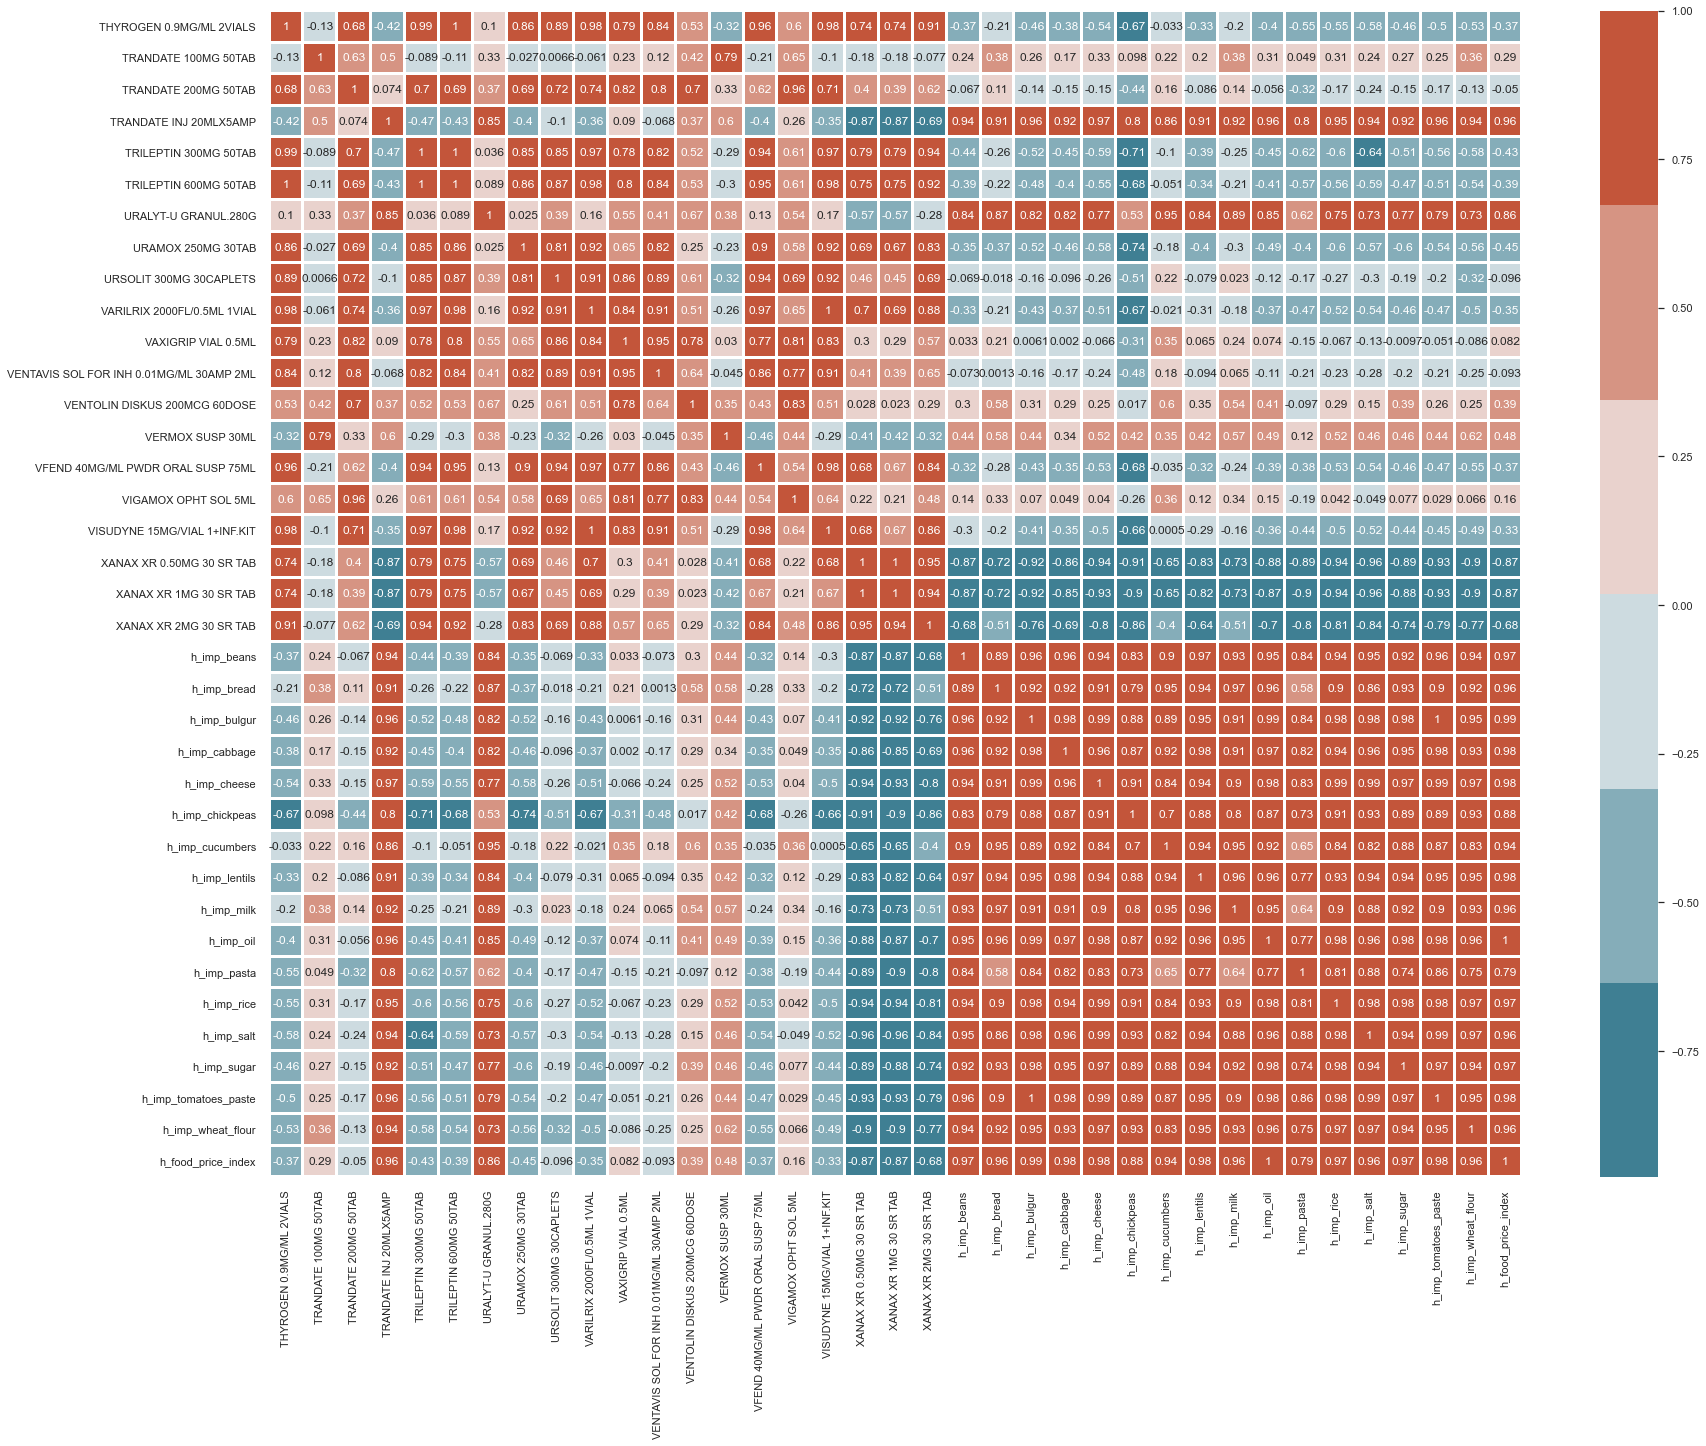

In [969]:
# correlation matrix of numerical features

plt.subplots(figsize=(25,20)) 
# heatmap of correlations, removing year column
sns.heatmap(new_df.iloc[:,1:].corr(), annot=True, cmap=sns.diverging_palette(220, 20), linewidth=2)

<AxesSubplot:>

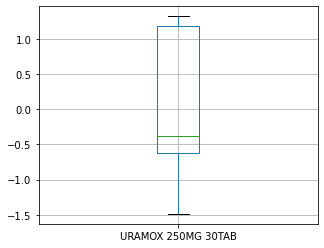

In [666]:
# boxplots to consider outliers

new_df[["URAMOX 250MG 30TAB"]].boxplot(figsize=(5,4))

<AxesSubplot:>

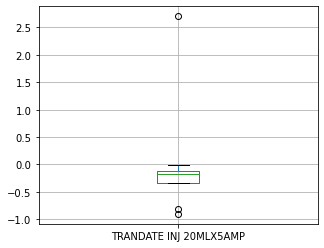

In [667]:
new_df[["TRANDATE INJ 20MLX5AMP"]].boxplot(figsize=(5,4))

<AxesSubplot:>

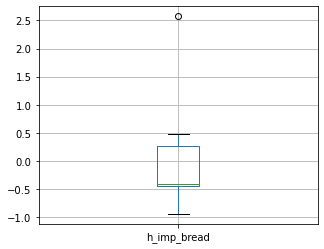

In [668]:
new_df[["h_imp_bread"]].boxplot(figsize=(5,4))

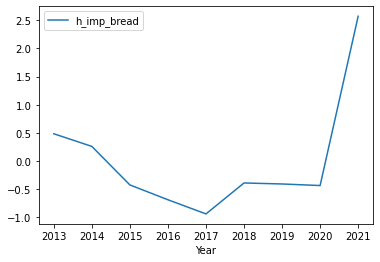

In [669]:
new_df.plot(x ='Year', y='h_imp_bread', kind = 'line')
plt.show()

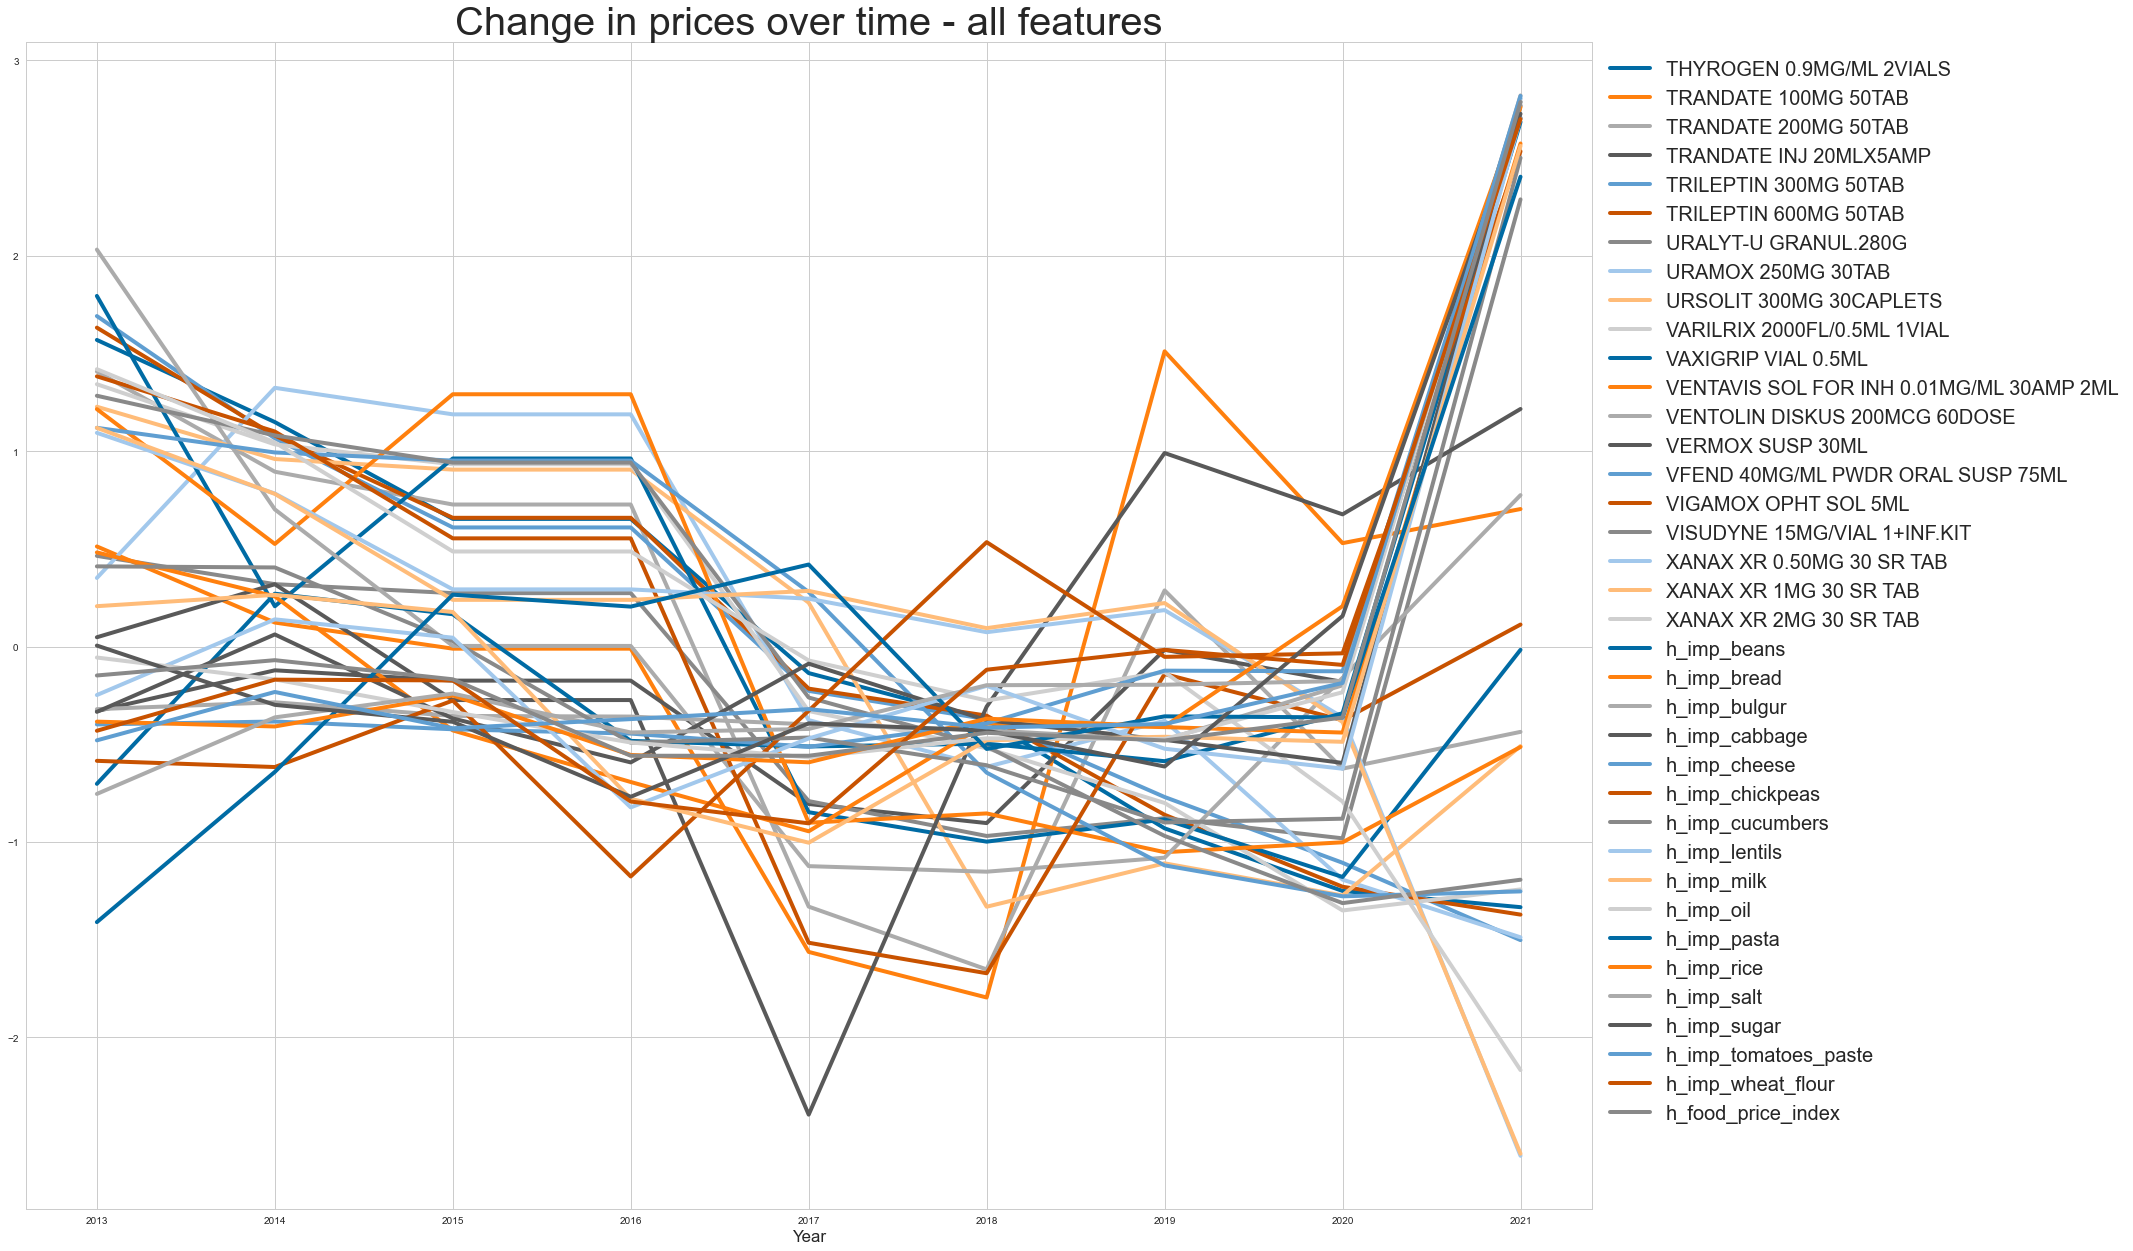

In [731]:
# plot of all features

new_df.plot(x ='Year', figsize=(25,20))
plt.style.use('seaborn-whitegrid')
plt.title('Change in prices over time - all features', size=40)
plt.legend(bbox_to_anchor=(1.0, 1.0), prop={'size': 20})

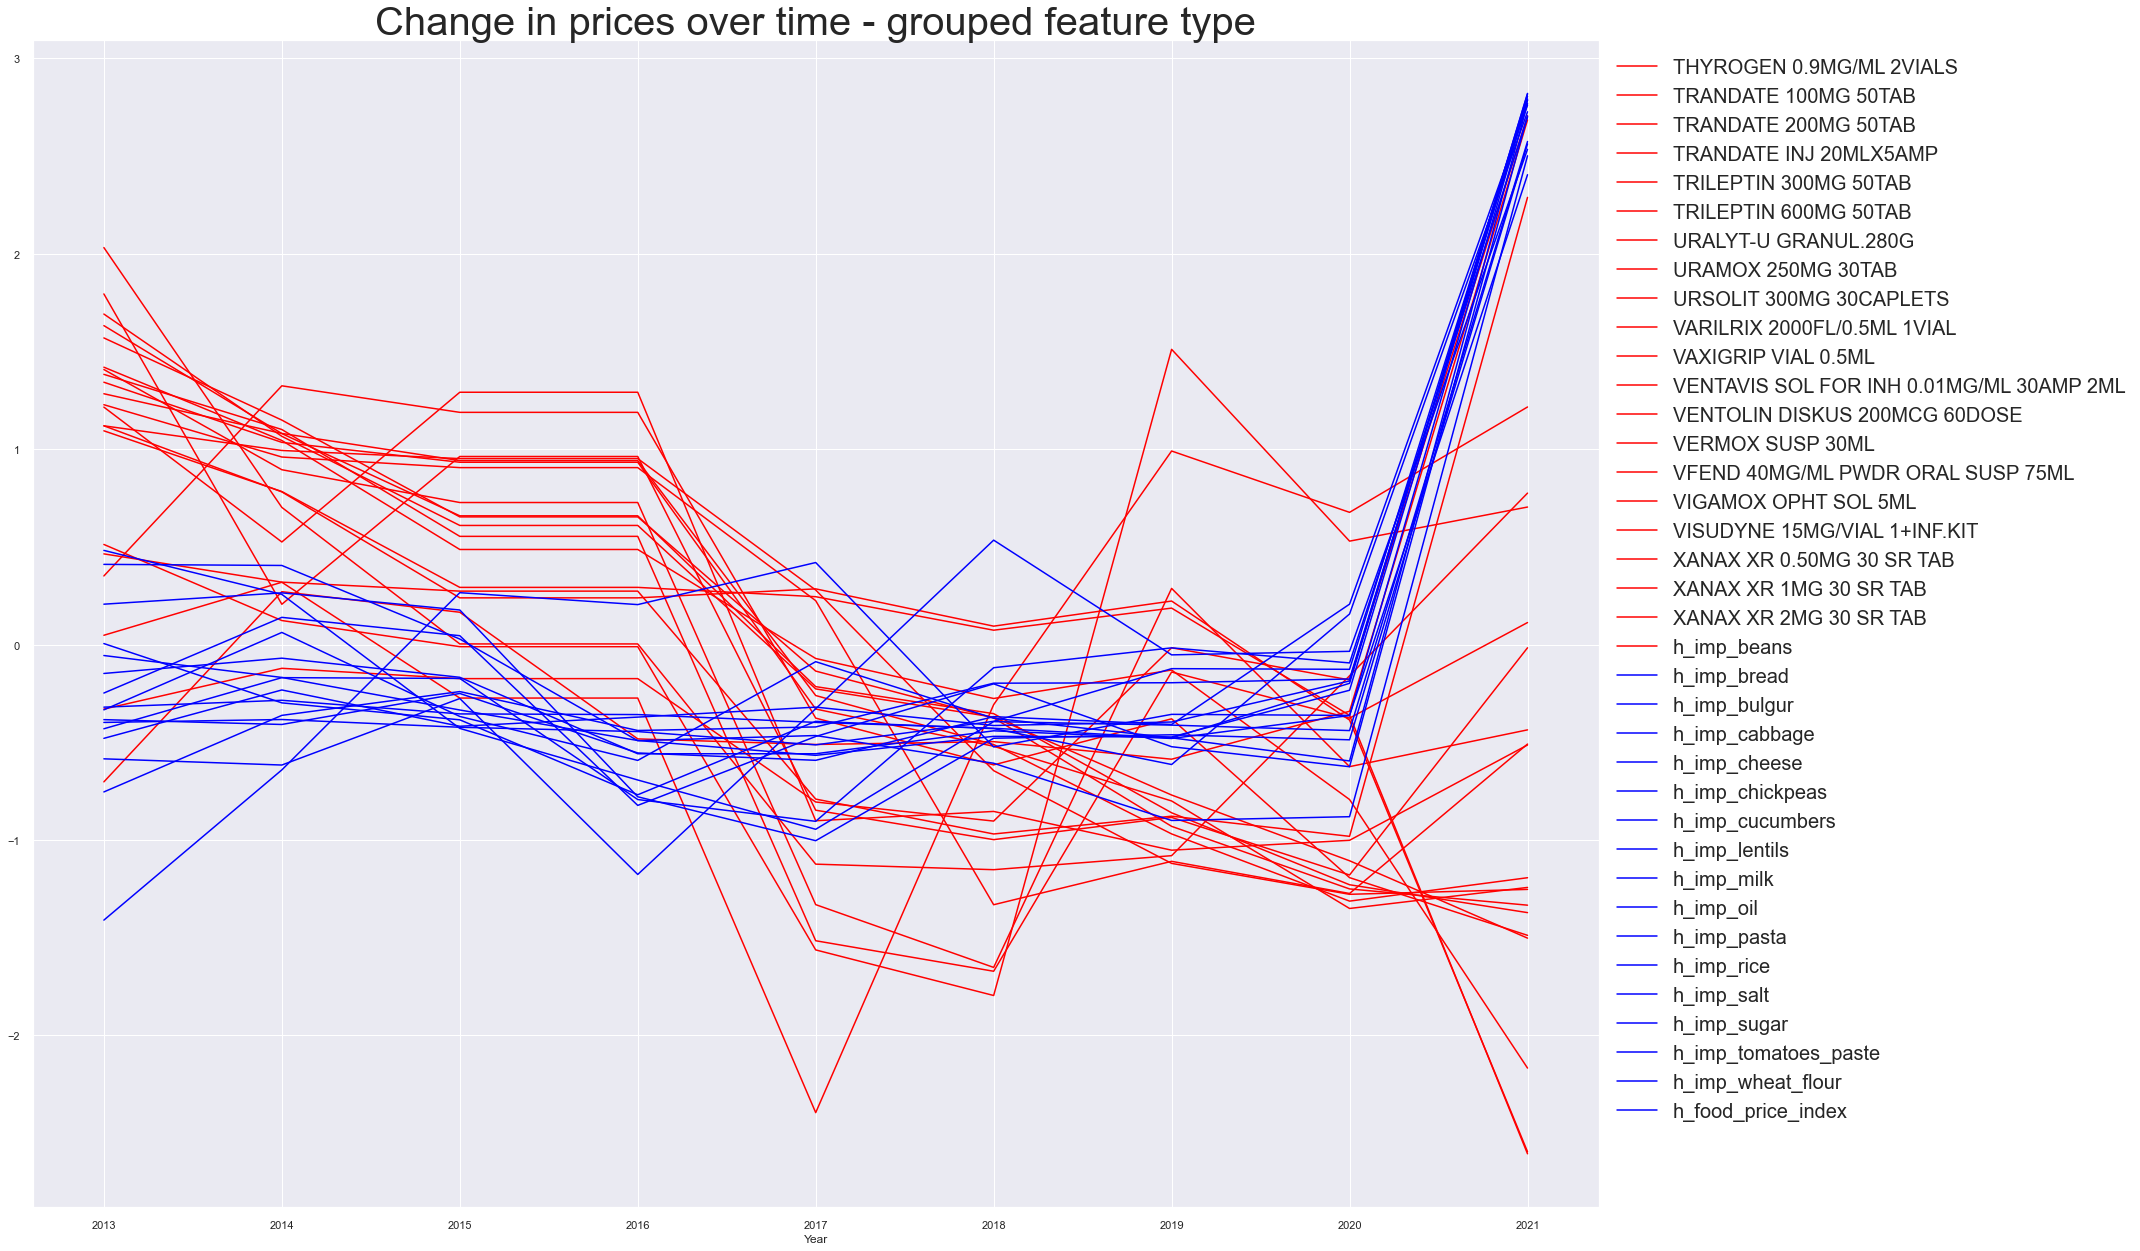

In [972]:
# plot of all features, grouped by foods and drugs

# drug features -> red
# food features -> blue
colours = {'THYROGEN 0.9MG/ML 2VIALS': '#FF0000', 
           'TRANDATE 100MG 50TAB': '#FF0000',
           'TRANDATE 200MG 50TAB': '#FF0000',
           'TRANDATE INJ 20MLX5AMP': '#FF0000',
           'TRILEPTIN 300MG 50TAB': '#FF0000',
           'TRILEPTIN 600MG 50TAB': '#FF0000',
           'URALYT-U GRANUL.280G': '#FF0000',
           'URAMOX 250MG 30TAB': '#FF0000',
           'URSOLIT 300MG 30CAPLETS': '#FF0000',
           'VARILRIX 2000FL/0.5ML 1VIAL': '#FF0000',
           'VAXIGRIP VIAL 0.5ML': '#FF0000',
           'VENTAVIS SOL FOR INH 0.01MG/ML 30AMP 2ML': '#FF0000',
           'VENTOLIN DISKUS 200MCG 60DOSE': '#FF0000',
           'VERMOX SUSP 30ML': '#FF0000',
           'VFEND 40MG/ML PWDR ORAL SUSP 75ML': '#FF0000',
           'VIGAMOX OPHT SOL 5ML': '#FF0000',
           'VISUDYNE 15MG/VIAL 1+INF.KIT': '#FF0000',
           'XANAX XR 0.50MG 30 SR TAB': '#FF0000',
           'XANAX XR 2MG 30 SR TAB': '#FF0000',
           'h_imp_beans': '#0000FF',
          'h_imp_bread': '#0000FF',
          'h_imp_bulgur': '#0000FF',
          'h_imp_cabbage': '#0000FF',
          'h_imp_cheese': '#0000FF',
           'h_imp_chickpeas': '#0000FF',
           'h_imp_cucumbers': '#0000FF',
           'h_imp_lentils': '#0000FF',
           'h_imp_milk': '#0000FF',
           'h_imp_oil': '#0000FF',
           'h_imp_pasta': '#0000FF',
           'h_imp_rice': '#0000FF',
           'h_imp_salt': '#0000FF',
           'h_imp_sugar': '#0000FF',
           'h_imp_tomatoes_paste': '#0000FF',
           'h_imp_wheat_flour': '#0000FF',
           'h_food_price_index': '#0000FF',
          }

# plot
new_df.plot(x='Year',color=[colours.get(x, '#FF0000') for x in new_df.columns], figsize=(25,20))
plt.style.use('bmh')
plt.title('Change in prices over time - grouped feature type', size=40)
plt.legend(bbox_to_anchor=(1.0, 1.0), prop={'size': 20})
plt.show()